# Detecting Dwarf Galaxies: The Performance & Limitations of Various Density Estimators

### Nicolas Garavito, Jennifer Kadowaki, Matt Kirby, Ben Lew, Ragadeepika Pucha

## Dwarf Galaxies - Why are they important?

- The $\Lambda$-CDM model of structure formation has many issues in the low-mass scales: The Missing Satellites Problem, Too Big to Fail Problem.
- Study of Dwarf Galaxies will help in solving these problems.
- Dwarf Galaxies are building blocks of galaxy formation and evolution.
- Study of Environmental factors in the growth of galaxies.
- Study of Reionization in the growth of galaxies.

## Detection of Dwarf Galaxies

- Before SDSS, only a few dwarf galaxies were known. 
- SDSS revolutionized the field with the detection of more and more dwarf galaxies - especially ultra-faint galaxies.
- Depth of SDSS (~24 mag). The upcoming large surveys (LSST) are going to map the sky much deeper - Need some method to detect dwarf galaxies.
- The easiest direct method is finding over-densities of resolved stars.

## Outline of the Project

- Getting SDSS data of known dwarf galaxies using SQL queries.
- Applying Different Density Estimators to each of them.
- Applying the Different Estimators to simulated data.
- Conclusions

## Getting the SDSS Data - 

- SQL Query : 
```SQL
SELECT
    p.ra, p.dec, p.psfMag_g, psfMagErr_g, p.psfMag_r, p.psfMagErr_r, p.psfMag_i, p.psfMagErr_i
FROM PhotoObjAll AS p
WHERE
    p.ra BETWEEN 150.77 AND 152.77
    AND p.dec BETWEEN 15.08 AND 17.08
    AND dbo.fDistanceArcMinEq(151.77, 16.08, p.ra, p.dec) < 30.
    AND p.clean = 1
```
- Dwarf Galaxies Considered - 
    * Leo II ($M_{V}$ = -9.8, $r_{h}$ = 176 pc, ${\mu}_{V}$ = 24.2)
    * Draco ($M_{V}$ = -8.8, $r_{h}$ = 221 pc, ${\mu}_{V}$ = 25.0)
    * Willman I ($M_{V}$ = -2.7, $r_{h}$ = 25 pc, ${\mu}_{V}$ = 26.1)
    * Segue ($M_{V}$ = -1.5, $r_{h}$ = 29 pc, ${\mu}_{V}$ = 27.6)

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import sys
from numpy.random import random, exponential, randint
from astropy.table import Table
import os
import errno

In [2]:
sys.path.append('../code/')
import density_functions
from density_tools import density_peaks

In [3]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [4]:
## reading the data
def read_data(data):
    """
    Reads the fits data   """
    h = fits.open(data)
    t = h[1].data
    ra = t['ra']
    dec = t['dec']
    return ra, dec

In [5]:
sdss_data = ['draco.fits', 'leo2.fits', 'segue.fits', 'willman1.fits']
gal_name = ['Draco', 'Leo II', 'Segue', 'Willman I' ]
mock_data = ['test_field.fits', 'test_field1.fits']

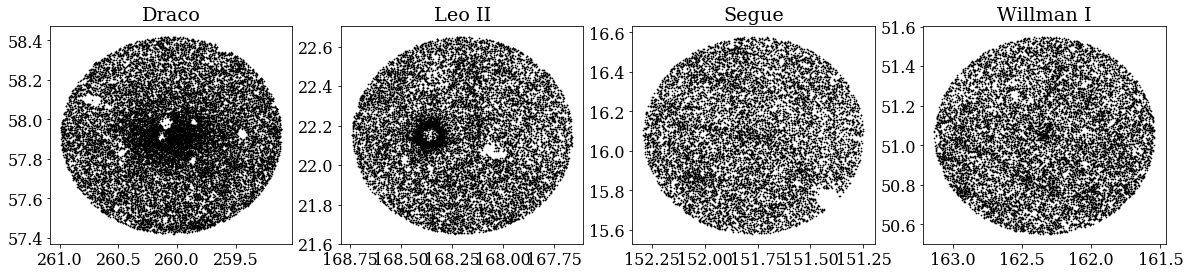

In [6]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    plt.subplot2grid((1,4), (0,k))
    plt.title(gal_name[k])
    
    plt.scatter(ra, dec, c = 'k', s = 0.5)
    plt.gca().invert_xaxis()
    
    k+=1

## Various Density Estimators - 

- Nearest Neighbor Density Estimator
- Kernel Density Estimator (Gaussian Kernels)
- Kernel Density Estimator (Top-Hat Kernels)
- Kernel Density Estimator (Exponential Kernels)
- Gaussian Mixture Model
- Two-point Correlation Funtion

In [7]:
## 

def overdensities(dens, sigma_min, sigma_max, xmin=0, xmax=1, ymin=0, ymax=1):
    # Defining grid
    x = np.linspace(xmin, xmax, np.shape(dens)[0])
    y = np.linspace(ymin, ymax, np.shape(dens)[1])
    X, Y = np.meshgrid(x, y)

    # Defining sigma as the standard deviation of the data
    sigma = np.std(dens.flatten())
    # Finding the median of the all the data in the field
    dens_median = np.median(dens.flatten())
    # Defining the contours range.·
    overdensities = []
    color_bar_labels = []

    for i in range(sigma_min, sigma_max+1):
        overdensities.append(dens_median + i*sigma)
        color_bar_labels.append(str(i) + '$\sigma$')
    #print(color_bar_labels)
    
    return X, Y, overdensities, color_bar_labels

## Nearest Neighbour Density Estimator 

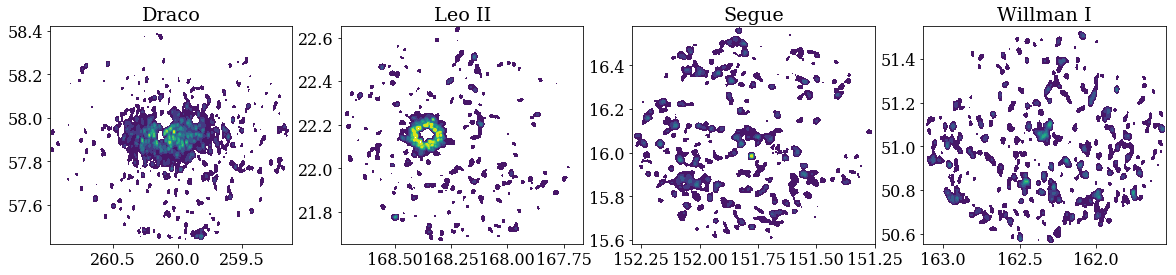

In [8]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_NN = density_functions.NN_bayesian_density(ra, dec, 20, 500)
    
    X_NN, Y_NN, overdens_NN, colorbar_NN = overdensities(dens_field_NN, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_NN, Y_NN, dens_field_NN, overdens_NN)
    plt.gca().invert_xaxis()
    
    k+=1
    

## Kernel Density Estimator (Guassian Kernel)



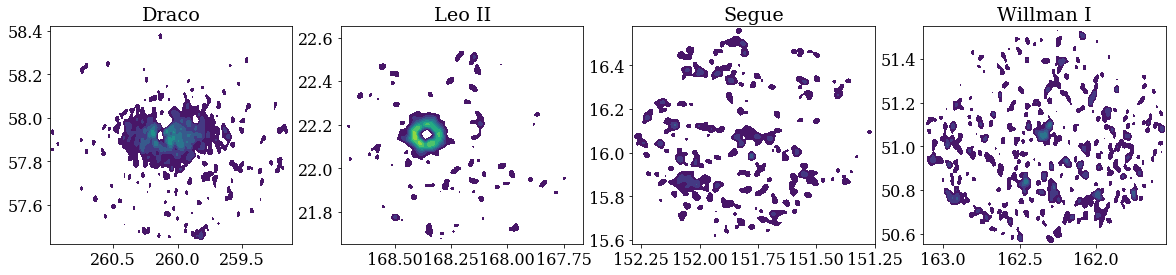

In [9]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_gaussian = density_functions.KDE(ra,dec, kernel = 'gaussian')
    
    X_KDE_gaussian, Y_KDE_gaussian, overdens_KDE_gaussian, colorbar_KDE_exp = overdensities(dens_field_KDE_gaussian, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))    
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_gaussian, Y_KDE_gaussian, dens_field_KDE_gaussian, overdens_KDE_gaussian)
    plt.gca().invert_xaxis()
    
    k+=1

## Kernel Density Estimator (Top-Hat Kernel)

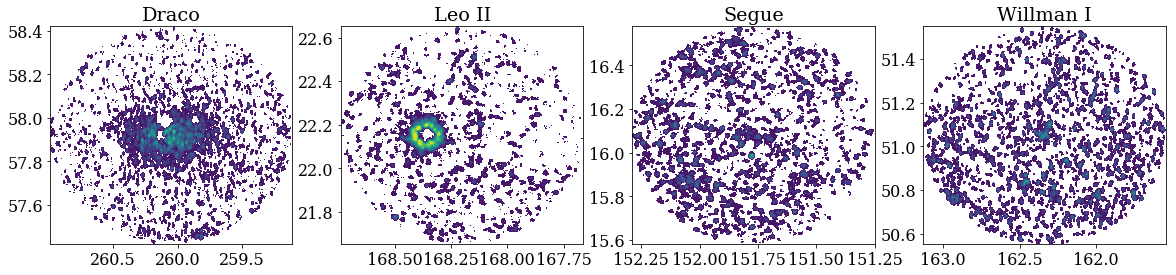

In [52]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_th = density_functions.KDE(ra,dec, kernel = 'tophat') 
    
    X_KDE_th, Y_KDE_th, overdens_KDE_th, colorbar_ = overdensities(dens_field_KDE_th, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_th, Y_KDE_th, dens_field_KDE_th, overdens_KDE_th)
    plt.gca().invert_xaxis()
    
    k+=1

## Kernel Density Estimator (Exponential Kernels)

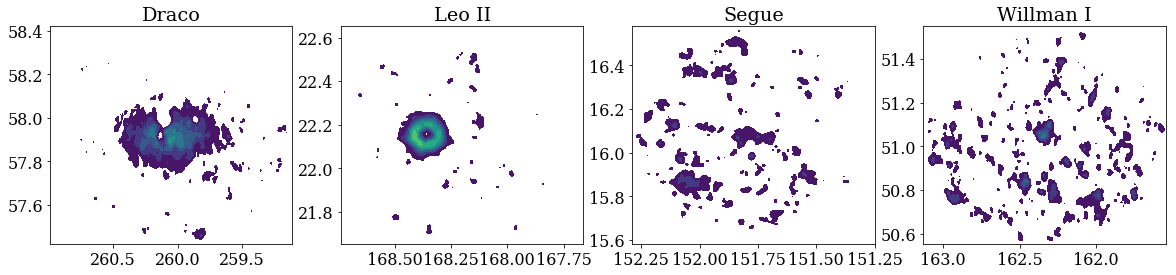

In [53]:
plt.figure(figsize = (20, 4))
k=0
for name in sdss_data:
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_KDE_exponential = density_functions.KDE(ra,dec, kernel = 'exponential')
    
    X_KDE_exp, Y_KDE_exp, overdens_KDE_exp, colorbar_NN = overdensities(dens_field_KDE_exponential, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))    
    plt.subplot2grid((1,4), (0, k))
    plt.title(gal_name[k])
    plt.contourf(X_KDE_exp, Y_KDE_exp, dens_field_KDE_exponential, overdens_KDE_exp)
    plt.gca().invert_xaxis()
    
    k+=1
    

## Gaussian Mixture Model

## Comparison of Different Estimators

In [ ]:
#figure = figsize(10, 10)
## To do 
## revere RA
## colorbar
## fix titles
## repeat for test and scatter plots
fig, axes = plt.subplots(4, 4, figsize=(12.5,12.5))
k=0
for name in sdss_data:
    print(name)
    ra, dec = read_data('../data/sdss_fields/'+name)
    dens_field_NN = density_functions.NN_bayesian_density(ra, dec, 20, 500)
    dens_field_KDE_gaussian = density_functions.KDE(ra,dec, kernel = 'gaussian')
    dens_field_KDE_th = density_functions.KDE(ra,dec, kernel = 'tophat')
    dens_field_KDE_exponential = density_functions.KDE(ra,dec, kernel = 'exponential')
    
    
    X_NN, Y_NN, overdens_NN, colorbar_NN = overdensities(dens_field_NN, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_gaussian, Y_KDE_gaussian, overdens_KDE_gaussian, colorbar_KDE_exp = overdensities(dens_field_KDE_gaussian, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_th, Y_KDE_th, overdens_KDE_th, colorbar_ = overdensities(dens_field_KDE_th, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))
    X_KDE_exp, Y_KDE_exp, overdens_KDE_exp, colorbar_NN = overdensities(dens_field_KDE_exponential, 1, 10, xmin=min(ra), xmax=max(ra), ymin=min(dec), ymax=max(dec))

    axes[0][0].set_title('NN')
    axes[0][1].set_title('KDE Gaussian')
    axes[0][2].set_title('KDE Top Hat')
    axes[0][3].set_title('KDE Exponential')

    axes[k][0].contourf(X_NN, Y_NN, dens_field_NN, overdens_NN)
    axes[k][1].contourf(X_KDE_gaussian, Y_KDE_gaussian, dens_field_KDE_gaussian, overdens_KDE_gaussian)
    axes[k][2].contourf(X_KDE_th, Y_KDE_th, dens_field_KDE_th, overdens_KDE_th)
    axes[k][3].contourf(X_KDE_exp, Y_KDE_exp, dens_field_KDE_exponential, overdens_KDE_exp)

    k+=1

    #xlim(min(ra), max(ra))
    #k+=1

## Testing Density Estimation Methods with Simulated Data
We implement each algorithm on synthetic dwarfs to obtain measurements of performance and robustness.

- ### Sample Completeness
  - What parameter space are we no longer detecting dwarf galaxies?


- ### Spurious Source Fraction
  - Are we detecting stellar overdensities in the background of fields containing dwarfs and in fields containing no dwarfs?
  - What parameter space are we prone to false positives?

## Simulated Data
Simulated data is composed of:
- ### Background Point Sources
  A uniformly random sample of background point sources (of varying crowdedness)
  - Background Densities: 10000, 15000, and 20000 stars / square degree.


- ### Stars in Dwarf Galaxy
  A randomly sampled exponential profile of stars in the dwarf galaxy (of varying numbers and scale lengths).
  - Number of Stars in Dwarf: 100, 500, 1000, and 5000 stars
  - Scale Lengths of Dwarf: 0.1, 0.15, 0.2 degrees


## Obtaining Realistic Parameters for Simulated Fields

In [24]:
def create_directory(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

### Define circular regions around dwarf galaxy

In [23]:
colors = ['psfMag_g','psfMag_r','psfMag_i']
plt_colors = ['k','r','g','b']


def create_regions(table, ra_obj, dec_obj, radius):
    """
    Defines boundaries of radial regions around dwarf galaxy and outputs separate tables for point sources in each region.
    
    param table:   astropy.table.Table for field with SDSS dwarf. (Table includes both dwarf & background.)
    param ra_obj:  RA of dwarf galaxy in degrees.
    param dec_obj: dec of dwarf galaxy in degrees.
    param radius:  tuple of floats containing radial bounds (in degrees) for each region.
    
    returns List of astropy.table.Table containing stars of each region.
    """
    
    ra  = (table['ra']  -  ra_obj) * np.cos(table['dec']/180.* np.pi)
    dec = table['dec'] - dec_obj
    
    sq_dist = ra**2 + dec**2

    
    flag1 = list(sq_dist > radius[0]**2)
    flag4 = list(sq_dist < radius[2]**2)
    flag2 = [val and not flag1[index] for index, val in enumerate(sq_dist > radius[1]**2)]
    flag3 = [val and not flag4[index] for index, val in enumerate(sq_dist < radius[1]**2)]
    
    flag_list = [flag1, flag2, flag3, flag4]
    region_list = []
    
    for count, flag in enumerate(flag_list):
        reg = table[np.where(np.array(flag)==True)]
        region_list.append(reg)
            
    return region_list

### Plotting Each Region around Dwarfs

In [17]:
def plot_regions(table_list, file=None, directory='regions'):

    if directory==None:
        if file==None:
            file = 'regions.pdf'
    else:
        create_directory(directory)
        if file==None:
            file = os.path.join(directory, 'regions.pdf')
        else:
            file = os.path.join(directory, file)

    
    plt.clf()
    plt.figure(figsize=(8,8))
    plt.xlabel(r"RA (degrees)")
    plt.ylabel(r"dec (degrees)")
    plt.title(r"Stellar Positions")
    
    for count,reg in enumerate(table_list):    
        plt.scatter(reg['ra'], reg['dec'], s=1.5, c=plt_colors[count], marker='.')
    
    plt.savefig(file, format='pdf', dpi=72, clobber=True)

### Computing Region Statistics

In [16]:
def area(outer, inner):
    """
    Returns the area (square degrees) encompassed by a region.
    """
    return np.pi * (outer**2 - inner**2)


def density(num, outer, inner):
    """
    Returns the stellar density (# stars / square degree) contained in a region.
    """
    return num/area(outer, inner)

### Analyzing SDSS Fields



---------------draco.fits---------------

Background Density:	 20539 stars per square degree
Num Stars in Dwarf:	 3165

Region 1 
	Area:	 0.5890486225480862 
	Points:	 12099 / 19297 
	Density:  20539.900335667644

Region 2 
	Area:	 0.16493361431346412 
	Points:	 5347 / 19297 
	Density:  32419.104027137695

Region 3 
	Area:	 0.023561944901923454 
	Points:	 1307 / 19297 
	Density:  55470.802832295245

Region 4 
	Area:	 0.0058904862254808635 
	Points:	 544 / 19297 
	Density:  92352.30831145712


---------------leo1.fits---------------

Background Density:	 16557 stars per square degree
Num Stars in Dwarf:	 104

Region 1 
	Area:	 0.5890486225480862 
	Points:	 9753 / 13108 
	Density:  16557.207039736055

Region 2 
	Area:	 0.16493361431346412 
	Points:	 2754 / 13108 
	Density:  16697.627172383993

Region 3 
	Area:	 0.023561944901923454 
	Points:	 601 / 13108 
	Density:  25507.232212861087

Region 4 
	Area:	 0.0058904862254808635 
	Points:	 0 / 13108 
	Density:  0.0


---------------segue.f

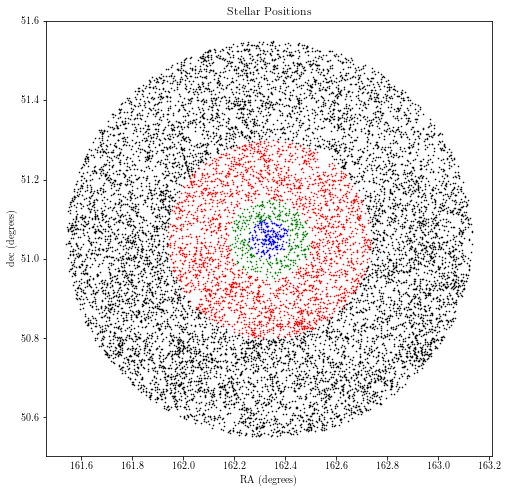

In [26]:
data_dir   = 'fields'        # Directory containing coord_file & all true dwarf fields (.fits).
region_dir = 'regions'
coord_file = 'coords.txt'

field_list = np.genfromtxt(os.path.join(data_dir, coord_file), delimiter='\t', dtype='U32,f8,f8')

# Defines radii (degrees) regions around true dwarf galaxies.
radii = [0.5, 0.25, 0.1, 0.05, 0.025]


for file, ra, dec in field_list:
    hdulist = fits.open(os.path.join(data_dir,file))
    table = hdulist[1].data
    hdulist.close()

    
    #data = imputation(table)
    data    = table
    regions = create_regions(data, ra, dec, radius=(radii[1], radii[2], radii[3]))

    bkg = density(len(regions[0]), radii[0], radii[1])
    num = len(data) - bkg * area(radii[0],0)
    
    print("\n\n---------------{}---------------\n".format(file))
    print("Background Density:\t", str(int(bkg)), "stars per square degree"
          "\nNum Stars in Dwarf:\t", str(int(num)))

    
    for idx in np.arange(4):
        print("\nRegion {}".format(idx+1),
              "\n\tArea:\t", str(area(radii[idx],radii[idx+1])),
              "\n\tPoints:\t", str(len(regions[idx])), "/", str(len(data)),
              "\n\tDensity: ", str(density(len(regions[idx]), radii[idx], radii[idx+1])))
    
    plot_regions(regions, file=file.split('.')[0]+'_regions.pdf', directory=region_dir)
    

## Creating Simulated Fields
### Creating the Background

In [3]:
def background(r, num):
    """
    Samples num pairs of uniformly random variables, centered at 0. between x = [-r,r] and y = [-r,r].
    
    param r:   Half the length of the square sampled.
    param num: Number of randomly generated pairs.
    
    returns ndarray with dimensions (2, num).
    """
    
    return 2 * r * np.transpose(random(size=(num,2)) - 0.5)

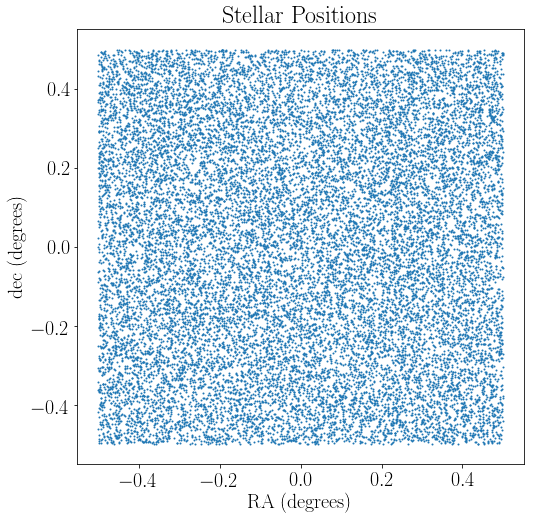

In [5]:
plt.rcParams['savefig.facecolor'] = "1."
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='20')


position = background(0.5, 20000)

plt.clf()
plt.figure(figsize=(8,8))

plt.xlabel(r"RA (degrees)")
plt.ylabel(r"dec (degrees)")
plt.title(r"Stellar Positions")

plt.scatter(position[0], position[1], s=1.)

### Creating the Dwarf Galaxy

In [7]:
def exponential_profile(scale, num):
    """
    Samples num pairs of exponentially random variables, centered at 0. between x = [-r,r] and y = [-r,r].
    
    param n:   Sersic Index (n=1 is good for spirals and dEs.)
    param num: Number of randomly generated pairs.
    
    returns ndarray with dimensions (2, num).
    """

    r = exponential(scale=scale,size=num)
    theta = 2 * np.pi * random(size=num)
    
    return np.array([r * np.cos(theta), r * np.sin(theta)])

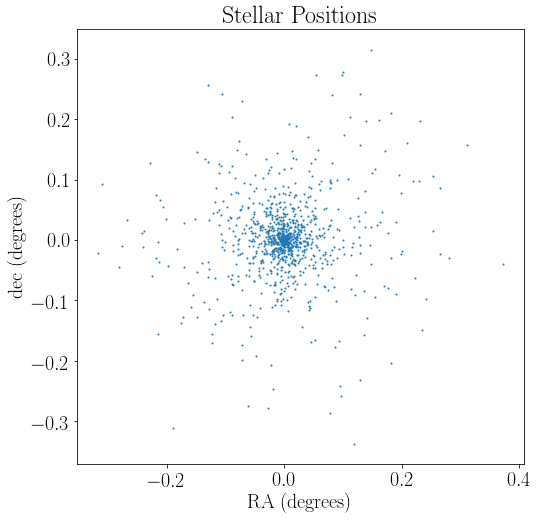

In [8]:
position = exponential_profile(0.07, 1000)

plt.clf()
plt.figure(figsize=(8,8))

plt.xlabel(r"RA (degrees)")
plt.ylabel(r"dec (degrees)")
plt.title(r"Stellar Positions")

plt.scatter(position[0], position[1], s=1.)

### Creating a Binary .fits Table

In [9]:
def create_fits(data, file=None):
    
    if file==None: file = 'file.pdf'
    
    ra  = fits.Column(name='ra',  format='D', unit='deg', array=data[0])
    dec = fits.Column(name='dec', format='D', unit='deg', array=data[1])

    tbhdu = fits.BinTableHDU.from_columns([ra, dec])        
    tbhdu.writeto(file, clobber=True)
    
    return tbhdu

### Creating a Simulated Field

In [10]:
def create_sim(r, dnum, scale, bnum=34000, circ=True, directory='simulated'):

    """
    Generates a Table & Plot of Stars in a Simulated Dwarf Galaxy in a Uniformly Random Background
    
    param r:     Background Radius  --  (r=0.5)
    param dnum:  Number of Stars in the Dwarf Galaxy
    param scale: Scale Length of Dwarf Galaxy
    param bnum:  Number of Point Sources in Pre-Filtered Background per 1 square degree
    
    returns astropy.io.fits Table
    """
    
    create_directory(directory)   
    append = "{}_{}_{}_{}".format(r,dnum,scale,bnum)
    
    # Defines filenames for the .fits files for the dwarf galaxy, the background, the test field,
    #    and a .pdf for the test field.
    plot_file       = os.path.join(directory, "field_{}.pdf".format(append))
    fits_file       = os.path.join(directory, "field_{}.fits".format(append))
    dwarf_file      = os.path.join(directory, "dwarf_{}.fits".format(append))
    background_file = os.path.join(directory, "background_{}.fits".format(append))
    

    # Generates stellar positions for the dwarf and the background, with the dwarf centered in 1 square degree field.
    back  = background(r, bnum)
    dwarf = exponential_profile(scale, dnum)
    
    
    # Executed if the desired field is a circle centered on the dwarf with radius r. 
    if circ:
        # Only keeps the stars in a r=0.5 radius. (Recall original shape is a square.)
        back_filt  = np.array([pair for pair in np.transpose(back) if pair[0]**2 + pair[1]**2 < r**2])
        dwarf_filt = np.array([pair for pair in np.transpose(dwarf) if pair[0]**2 + pair[1]**2 < r**2])
        
        back  = np.transpose(back_filt)
        dwarf = np.transpose(dwarf_filt)

        # The number of stars remaining after filtering
        bnum = np.shape(back_filt)[0]
        dnum = np.shape(dwarf_filt)[0]

    print("Number of Background Sources:\t", bnum)
    print("Number of Stars in Dwarf:\t", dnum)
    
    
    # Creates a astropy.io.fits.Table for background, dwarf, and simulated test field.
    back_table  = create_fits(back, file=background_file)
    dwarf_table = create_fits(dwarf, file=dwarf_file)
    test_table  = create_fits(np.append(back, dwarf, axis=1), file=fits_file)

    # Generates a .pdf plot for the background (black) & the dwarf (red).
    plot_regions([back_table.data, dwarf_table.data], file=plot_file, directory=None)

In [ ]:
r     = 0.5                    # Background Radius
dnum  = [100, 500, 1000, 5000] # Number of Stars in the Dwarf Galaxy
scale = [0.1, 0.15, 0.2]       # Scale Length of Dwarf Galaxy
bnum  = [10000, 15000, 20000]  # Number of Background Point Sources per 1 square degree

for d in dnum:
    for s in scale:
        for b in bnum:
            create_sim(r, d, s, b)

### Examples of Dwarf Galaxies of Various Population Sizes:
(scale=0.15, bnum=15000)

dnum = 100 | 500 | 1000 | 5000
     -     |  -  |  -   |  -
<img src="images/field_0.5_100_0.15_15000.png"> | <img src="images/field_0.5_500_0.15_15000.png"> | <img src="images/field_0.5_1000_0.15_15000.png"> | <img src="images/field_0.5_5000_0.15_15000.png">

### Examples of Dwarf Galaxies of Various Scale Lengths:
(dnum=1000, bnum=15000)

scale = 0.1 | 0.15 | 0.2
      -     |   -  |  -
<img src="images/field_0.5_1000_0.1_15000.png"> | <img src="images/field_0.5_1000_0.15_15000.png"> | <img src="images/field_0.5_1000_0.2_15000.png">

### Examples of Dwarf Galaxies in Various Background Densities:
(dnum=1000, scale=0.15)

bnum = 10000 | 15000 | 20000
     -       |   -   |   -
<img src="images/field_0.5_1000_0.15_10000.png"> | <img src="images/field_0.5_1000_0.15_15000.png"> | <img src="images/field_0.5_1000_0.15_20000.png">

## Two-Point Correlation Functions

$$\xi(R) = \frac{RR-2DR+RR}{RR}$$

Pros:
- Will find any structure in the data, regardless of its shape, density or extent if done correctly.
- Simple to calculate.
- Can be jackknifed to find error bars.

Cons:
- If multiple objects are in the image, the signals will be blended together.
- Requires detailed information about the observing mask.
- Since we are pair counting, it can have very long run times (but can be parallelized easily!).

### Correlation Function with no dwarf

![empty](images/correlationfunction_empty.png)

### Dwarf with no background

![](images/correlationfunction_perfect.png)

### Full simulated field

![](images/correlationfunction_mock.png)

## Conclusions